In [132]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [133]:
qualifyings = pd.read_csv('qualifying.csv')
qualifyings

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
10249,10307,1132,822,15,77,16,1:32.431,\N,\N
10250,10308,1132,825,210,20,17,1:32.905,\N,\N
10251,10309,1132,839,214,31,18,1:34.557,\N,\N
10252,10310,1132,815,9,11,19,1:38.348,\N,\N


In [134]:
races = pd.read_csv('races.csv')
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


In [135]:
silverstone_races = races[
    (races['circuitId'] == 9) & (races['year'].between(2000, 2023))
][['raceId', 'year']]  # Solo necesitamos race_id y year

silverstone_races

,raceId,year
7,8,2009
25,26,2008
43,44,2007
59,60,2006
80,81,2005
99,100,2004
117,118,2003
132,133,2002
150,151,2001
160,161,2000


In [136]:
qualifyings_silverstone = qualifyings.merge(silverstone_races, on='raceId')
display(qualifyings_silverstone)

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,year
0,169,26,5,1,23,1,1:19.957,1:19.597,1:21.049,2008
1,170,26,17,9,10,2,1:20.982,1:19.710,1:21.554,2008
2,171,26,8,6,1,3,1:20.370,1:19.971,1:21.706,2008
3,172,26,1,1,22,4,1:20.288,1:19.537,1:21.835,2008
4,173,26,2,2,3,5,1:21.022,1:19.802,1:21.873,2008
...,...,...,...,...,...,...,...,...,...,...
478,9828,1108,815,9,11,16,1:29.968,\N,\N,2023
479,9829,1108,852,213,22,17,1:30.025,\N,\N,2023
480,9830,1108,855,51,24,18,1:30.123,\N,\N,2023
481,9831,1108,856,213,21,19,1:30.513,\N,\N,2023


In [137]:
qualifyings_silverstone = qualifyings_silverstone[
    (qualifyings_silverstone['q3'] != r'\N') | (qualifyings_silverstone['year'] <= 2005)
]

qualifyings_silverstone

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,year
0,169,26,5,1,23,1,1:19.957,1:19.597,1:21.049,2008
1,170,26,17,9,10,2,1:20.982,1:19.710,1:21.554,2008
2,171,26,8,6,1,3,1:20.370,1:19.971,1:21.706,2008
3,172,26,1,1,22,4,1:20.288,1:19.537,1:21.835,2008
4,173,26,2,2,3,5,1:21.022,1:19.802,1:21.873,2008
...,...,...,...,...,...,...,...,...,...,...
468,9818,1108,847,131,63,6,1:29.412,1:28.782,1:27.155,2023
469,9819,1108,1,131,44,7,1:29.415,1:28.545,1:27.211,2023
470,9820,1108,848,3,23,8,1:29.466,1:28.067,1:27.530,2023
471,9821,1108,4,117,14,9,1:29.949,1:28.368,1:27.659,2023


In [138]:
def time_to_seconds(time_str):
    try:
        # Dividimos el tiempo en minutos y segundos con milésimas
        minutes, seconds = time_str.split(':')
        # Convertimos a flotante para conservar las milésimas
        return float(minutes) * 60 + float(seconds)
    except ValueError:
        # Si hay algún problema con el formato, devolvemos None
        return None

In [139]:
qualifyings_silverstone['q3_seconds'] = qualifyings_silverstone.apply(
    lambda row: time_to_seconds(row['q1']) if row['year'] <= 2005 else time_to_seconds(row['q3']),
    axis=1
)

In [140]:
fastest_q3_per_year = qualifyings_silverstone.groupby('year').agg(
    fastest_q3=('q3_seconds', 'min')
).reset_index()


fastest_q3_per_year

,year,fastest_q3
0,2000,85.703
1,2003,81.209
2,2004,78.233
3,2005,79.905
4,2006,80.253
5,2007,79.997
6,2008,81.049
7,2009,79.509
8,2010,89.615
9,2011,90.399


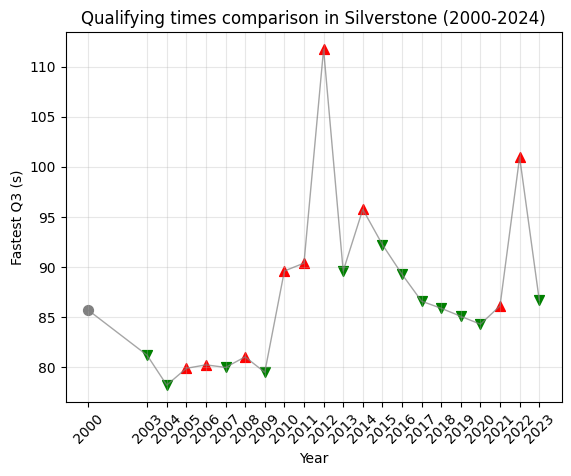

In [148]:
# Configurar colores y marcadores según las condiciones
colors = ['gray']  # Color inicial para el primer dato
markers = ['o']    # Marcador inicial para el primer dato

for i in range(1, len(fastest_q3_per_year)):
    if fastest_q3_per_year.loc[i, 'fastest_q3'] > fastest_q3_per_year.loc[i - 1, 'fastest_q3']:
        colors.append('red')  # Triángulo hacia arriba si es mayor
        markers.append('^')
    else:
        colors.append('green')  # Triángulo hacia abajo si es menor
        markers.append('v')

# Graficar los datos con los marcadores y colores
fig, ax = plt.subplots()

ax.plot(fastest_q3_per_year['year'], fastest_q3_per_year['fastest_q3'], color='gray', linestyle='-', linewidth=1, alpha=0.7)

for i in range(len(fastest_q3_per_year)):
    ax.scatter(
        fastest_q3_per_year.loc[i, 'year'], 
        fastest_q3_per_year.loc[i, 'fastest_q3'], 
        color=colors[i], 
        marker=markers[i],
        s=50,  # Tamaño del marcador
    )

# Personalización del gráfico
ax.set_xticks(fastest_q3_per_year['year'])  # Configura cada año como un tick
ax.set_xticklabels(fastest_q3_per_year['year'], rotation=45)  # Opcional: rotación para evitar solapamientos
ax.grid(alpha=0.3)
ax.set_title('Qualifying times comparison in Silverstone (2000-2024)')
ax.set_xlabel('Year')
ax.set_ylabel('Fastest Q3 (s)')
plt.show()

In [166]:
def best_qualis_00to23_df(raceId):

    qualifyings = pd.read_csv('qualifying.csv')
    races = pd.read_csv('races.csv')

    circuit_races = races[
    (races['circuitId'] == raceId) & (races['year'].between(2000, 2023))
    ][['raceId', 'year']]

    qualifyings_circuit = qualifyings.merge(circuit_races, on='raceId')

    qualifyings_circuit = qualifyings_circuit[
    (qualifyings_circuit['q3'] != r'\N') | (qualifyings_circuit['year'] <= 2005)]

    qualifyings_circuit['q3_seconds'] = qualifyings_circuit.apply(
    lambda row: time_to_seconds(row['q1']) if row['year'] <= 2005 else time_to_seconds(row['q3']),
    axis=1)

    fastest_q3_per_year = qualifyings_circuit.groupby('year').agg(
    fastest_q3=('q3_seconds', 'min')).reset_index()
    
    return fastest_q3_per_year

In [167]:
def draw_best_qualis(data,name: str):
    # Configurar colores y marcadores según las condiciones
    colors = ['gray']  # Color inicial para el primer dato
    markers = ['o']    # Marcador inicial para el primer dato

    for i in range(1, len(data)):
        if data.loc[i, 'fastest_q3'] > data.loc[i - 1, 'fastest_q3']:
            colors.append('red')  # Triángulo hacia arriba si es mayor
            markers.append('^')
        else:
            colors.append('green')  # Triángulo hacia abajo si es menor
            markers.append('v')

    # Graficar los datos con los marcadores y colores
    fig, ax = plt.subplots()

    ax.plot(data['year'], data['fastest_q3'], color='gray', linestyle='-', linewidth=1, alpha=0.7)

    for i in range(len(data)):
        ax.scatter(
            data.loc[i, 'year'], 
            data.loc[i, 'fastest_q3'], 
            color=colors[i], 
            marker=markers[i],
            s=50,  # Tamaño del marcador
        )

    # Personalización del gráfico
    ax.set_xticks(data['year'])  # Configura cada año como un tick
    ax.set_xticklabels(data['year'], rotation=45)  # Opcional: rotación para evitar solapamientos

    ax.grid(alpha=0.3)
    ax.set_title(f'Qualifying times comparison in {name} (2000-2024)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Fastest Q3 (s)')
    plt.show()

In [168]:
def best_qualis_from00 (raceID, name: str):
    return draw_best_qualis(best_qualis_00to23_df(raceID),name)

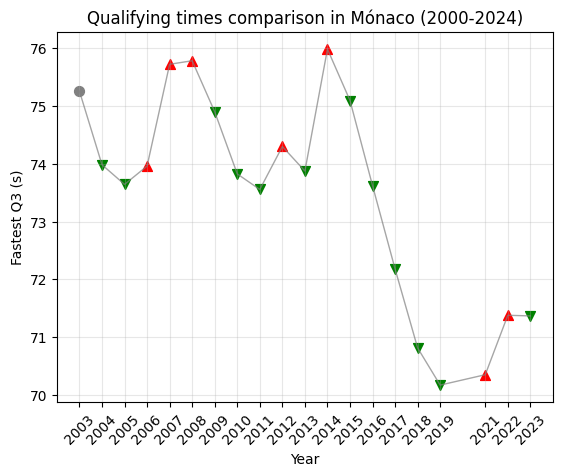

In [169]:
best_qualis_from00(6,'Mónaco')

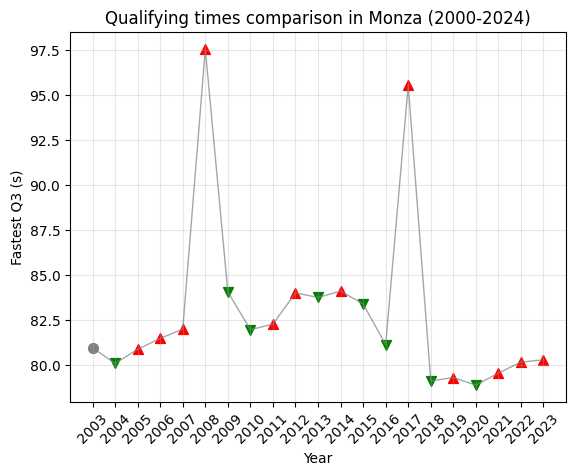

In [178]:
best_qualis_from00(14,'Monza')

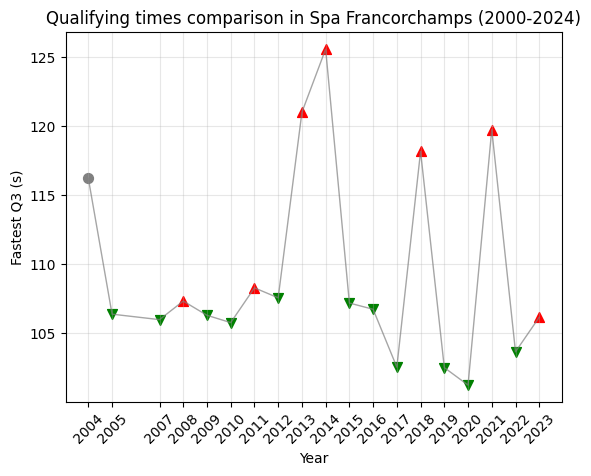

In [177]:
best_qualis_from00(13,'Spa Francorchamps')


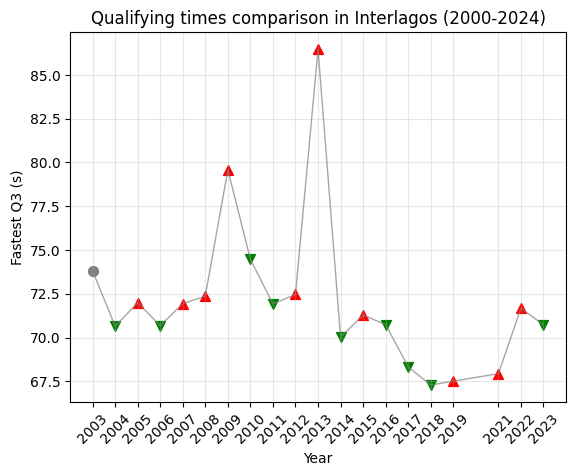

In [179]:
best_qualis_from00(18,'Interlagos')

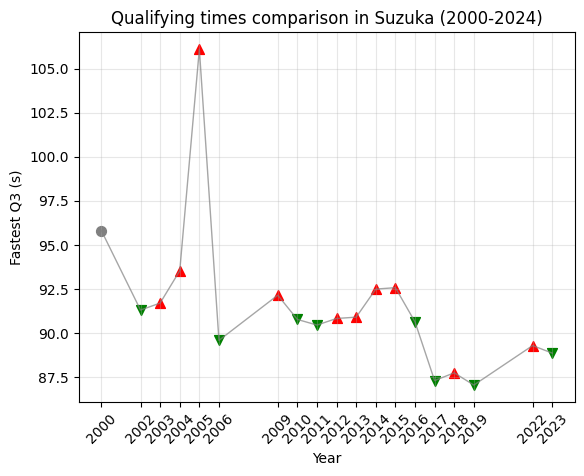

In [181]:
best_qualis_from00(22,'Suzuka')

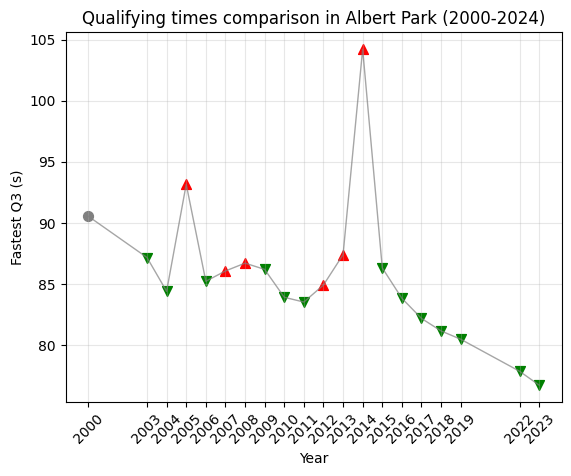

In [182]:
best_qualis_from00(1,'Albert Park')

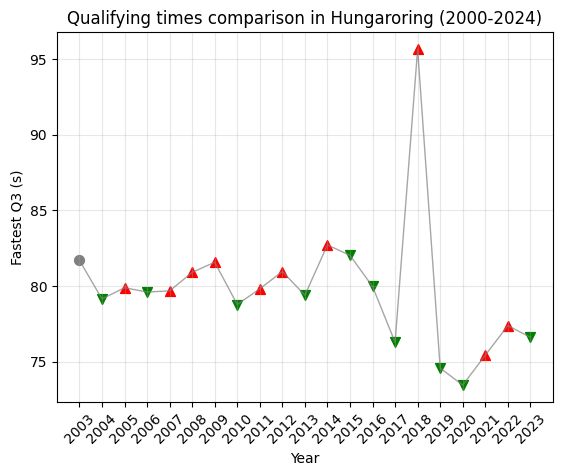

In [183]:
best_qualis_from00(11,'Hungaroring')

In [185]:
# Lista de raceId de los circuitos
race_ids = [6, 9, 14, 13, 18, 22, 1, 11]

# Generar un DataFrame por cada circuito
dfs = [
    best_qualis_00to23_df(raceId).rename(columns={'fastest_q3': f'fastest_q3_circuit{raceId}'})
    for raceId in race_ids
]

# Unir todos los DataFrames por año usando reduce y merge
from functools import reduce

merged_df = reduce(
    lambda left, right: pd.merge(left, right, on='year', how='inner'),
    dfs
)

# Sumar los tiempos de Q3 para cada año
merged_df['total_fastest_q3'] = merged_df.iloc[:, 1:].sum(axis=1)

# Mostrar el resultado final
display(merged_df)

,year,fastest_q3_circuit6,fastest_q3_circuit9,fastest_q3_circuit14,fastest_q3_circuit13,fastest_q3_circuit18,fastest_q3_circuit22,fastest_q3_circuit1,fastest_q3_circuit11,total_fastest_q3
0,2004,73.985,78.233,80.089,116.232,70.646,93.542,84.408,79.146,676.281
1,2005,73.644,79.905,80.878,106.391,71.988,106.106,93.171,79.882,691.965
2,2009,74.902,79.509,84.066,106.308,79.576,92.160,86.202,81.569,684.292
3,2010,73.826,89.615,81.962,105.778,74.470,90.785,83.919,78.773,679.128
4,2011,73.556,90.399,82.275,108.298,71.918,90.466,83.529,79.815,680.256
5,2012,74.301,111.746,84.010,107.573,72.458,90.839,84.922,80.953,706.802
6,2013,73.876,89.607,83.755,121.012,86.479,90.915,87.407,79.388,712.439
7,2014,75.989,95.766,84.109,125.591,70.023,92.506,104.231,82.715,730.930
8,2015,75.098,92.248,83.397,107.197,71.282,92.584,86.327,82.020,690.153
9,2016,73.622,89.287,81.135,106.744,70.736,90.647,83.837,79.965,675.973


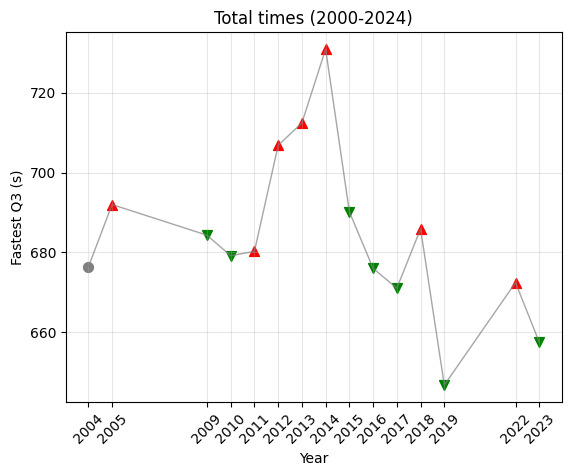

In [186]:
# Configurar colores y marcadores según las condiciones
colors = ['gray']  # Color inicial para el primer dato
markers = ['o']    # Marcador inicial para el primer dato

for i in range(1, len(merged_df)):
    if merged_df.loc[i, 'total_fastest_q3'] > merged_df.loc[i - 1, 'total_fastest_q3']:
        colors.append('red')  # Triángulo hacia arriba si es mayor
        markers.append('^')
    else:
        colors.append('green')  # Triángulo hacia abajo si es menor
        markers.append('v')

# Graficar los datos con los marcadores y colores
fig, ax = plt.subplots()

ax.plot(merged_df['year'], merged_df['total_fastest_q3'], color='gray', linestyle='-', linewidth=1, alpha=0.7)

for i in range(len(merged_df)):
    ax.scatter(
        merged_df.loc[i, 'year'], 
        merged_df.loc[i, 'total_fastest_q3'], 
        color=colors[i], 
        marker=markers[i],
        s=50,  # Tamaño del marcador
    )

# Personalización del gráfico
ax.set_xticks(merged_df['year'])  # Configura cada año como un tick
ax.set_xticklabels(merged_df['year'], rotation=45)  # Opcional: rotación para evitar solapamientos
ax.grid(alpha=0.3)
ax.set_title('Total times (2000-2024)')
ax.set_xlabel('Year')
ax.set_ylabel('Fastest Q3 (s)')
plt.show()